## Python Code for CS2101 Lab5
### Spring 2016
### Department of Computer Science, National Tsing Hua University

This python code implements an Elliptic IIR Filter.
Students are to implement it in one-sample-per-cycle hardware using Verilog HDL.

In [17]:
%matplotlib inline
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
import random

# Infinite Impulse Response (IIR) Filter
def iir(x, a, b):
    N = len(x)
    y = np.zeros(N, dtype=x.dtype)
    for n in range(N):
        for i in range(len(a)):
            if n-i >= 0 and n-i < N:
                y[n] += a[i] * x[n-i]
        for j in range(1, len(b)):
            if n-j >= 0 and n-j < N:
                y[n] += b[j] * y[n-j]
    return y

In [18]:
# Fast Fourier Transform
def fft(x):
    '''Radix-2 Fast DFT'''
    N = len(x);
    Half_N = N // 2;
    X = np.zeros((N), dtype=complex);
    if N==1:
        X[0] = x[0]
    else:
        x_even = np.zeros((Half_N), dtype=complex)
        x_odd = np.zeros((Half_N), dtype = complex)
        for i in range(N):
            if i % 2 == 0:
                x_even[ i//2 ] = x[i]
            else:
                x_odd[ (i-1)//2 ] = x[i]
        X_even = fft(x_even)
        X_odd = fft(x_odd)
        for k in range(N):
            X[k] = X_even[k % Half_N] + X_odd[k % Half_N] * cmath.exp(-1j * 2 * math.pi * k / N)
    return X;

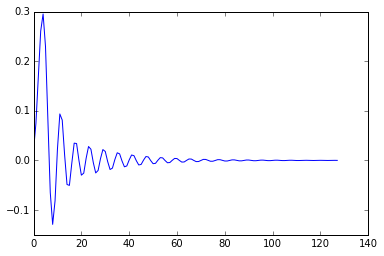

In [19]:
# Plot Impulse response of an IIR Filter


N = 1024  

imp = np.zeros(N)
imp[0] = 1.0

aeli = [1.9431e-2, 2.1113e-2, 3.7708e-2, 3.7708e-2, 2.1113e-2, 1.9431e-2]

beli = [1.0, +2.7580e0, -4.0110e0, +3.3711e0, -1.6542e0, +3.7959e-1]

heli = iir(imp, aeli, beli)

plt.plot(heli[0:128])

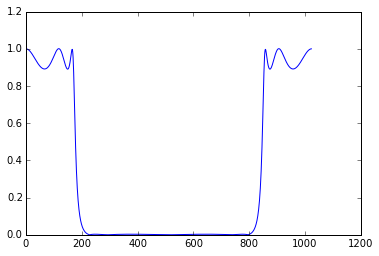

In [20]:
# Spectrum analysis shows that Cut-off Frequency is about 20% of Sampling Frequency

HELI = fft(heli)

plt.plot(np.abs(HELI))

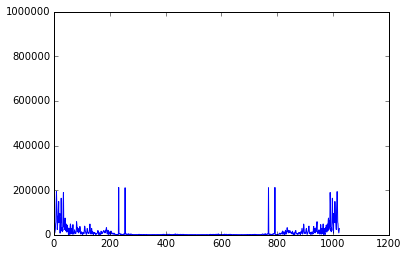

In [21]:
# Read a WAV file
# Add to it noise of 5000Hz and 5500Hz
# Show the spectrum of the noised WAV

import scipy.io.wavfile as sw

fs, x = sw.read('gtr-nylon22.wav')

N = 1024
f1 = int(5000 / (fs / N))
hf1_noise = np.array([ 2**11 + 2**11*math.cos(2*math.pi*f1/N*n) for n in range(len(x))], dtype=x.dtype)

f2 = int(5500 / (fs / N))
hf2_noise = np.array([ 2**11 + 2**11*math.cos(2*math.pi*f2/N*n) for n in range(len(x))], dtype=x.dtype)

x_noise = np.array([0.6*x[n] + 0.2*hf1_noise[n] + 0.2*hf2_noise[n] for n in range(len(x))], dtype=x.dtype)

sw.write('gtr-nylon22-noised.wav', fs, x_noise)

X = fft(x_noise[2**15:2**15+1024])
plt.plot(abs(X))


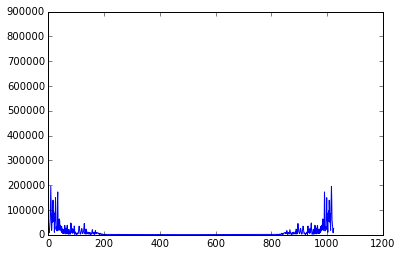

In [22]:
# Filter the noised WAV with the IIR filter
# Plot the recovered signal's spectrum

yeli = iir(x_noise, aeli, beli)

sw.write('gtr-nylon22-recovered.wav', fs, yeli)

Y = fft(yeli[2**15:2**15+1024])

plt.plot(abs(Y))

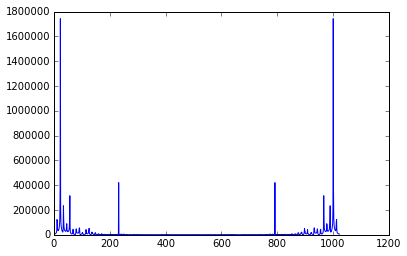

In [23]:
# Repeat above steps for a violin WAV

import scipy.io.wavfile as sw

fs, x = sw.read('violin22k.wav')

N = 1024
f = int(5000 / (fs / N))

hf_noise = np.array([ 2**11 + 2**11*math.cos(2*math.pi*f/N*n) for n in range(len(x))], dtype=x.dtype)

x_noise = np.array([0.6*x[n] + 0.4*hf_noise[n] for n in range(len(x))], dtype=x.dtype)

sw.write('violin22k-noised.wav', fs, x_noise)

X = fft(x_noise[2**15:2**15+1024])
plt.plot(abs(X))


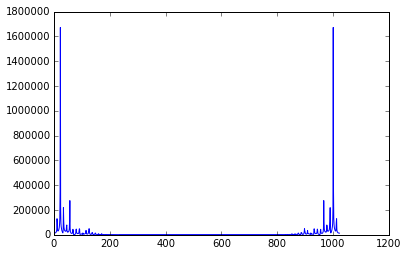

In [24]:
# Filter the noised WAV with the IIR filter
# Plot the recovered signal's spectrum

yeli = iir(x_noise, aeli, beli)

sw.write('violin22k-recovered.wav', fs, yeli)

Y = fft(yeli[2**15:2**15+1024])

plt.plot(abs(Y))

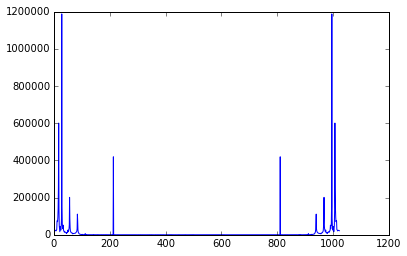

In [25]:
# Repeat above steps for a piano WAV

import scipy.io.wavfile as sw

fs, x = sw.read('pno-cs24k.wav')

sw.write('pno-cs24k.wav', fs, x)

N = 1024
f = int(5000 / (fs / N))

hf_noise = np.array([ 2**11 + 2**11*math.cos(2*math.pi*f/N*n) for n in range(len(x))], dtype=x.dtype)

x_noise = np.array([0.6*x[n] + 0.4*hf_noise[n] for n in range(len(x))], dtype=x.dtype)

sw.write('pno-cs24k-noised.wav', fs, x_noise)


X = fft(x_noise[2**15:2**15+1024])
plt.plot(abs(X))


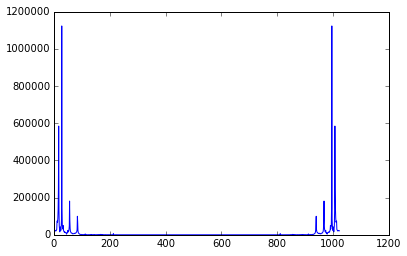

In [26]:
# Filter the noised WAV with the IIR filter
# Plot the recovered signal's spectrum

yeli = iir(x_noise, aeli, beli)

sw.write('pno-cs24k-recovered.wav', fs, yeli)

Y = fft(yeli[2**15:2**15+1024])

plt.plot(abs(Y))